In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [99]:
LoanPredict = pd.read_csv("Loan.csv")

In [4]:
pwd

'C:\\Users\\User'

In [100]:
LoanPredict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [101]:
LoanPredict.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [102]:
LoanPredict.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [103]:
from sklearn.preprocessing import LabelEncoder

In [104]:
TargetEncod = LabelEncoder()

In [105]:
LoanPredict["Loan_Status"] = TargetEncod.fit_transform(LoanPredict["Loan_Status"])

In [106]:
LoanPredict.drop('Loan_ID',axis = 1,inplace=True)

In [107]:
LoanPredict['Self_Employed'].isnull().sum()

32

In [108]:
pd.crosstab(LoanPredict.Education,LoanPredict.Self_Employed)

Self_Employed,No,Yes
Education,,
Graduate,389,65
Not Graduate,111,17


In [109]:
LoanPredict[LoanPredict['Gender'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,0
126,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,1
171,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,1
188,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,1
314,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,0
334,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,1
460,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,1
467,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,1
477,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,0
507,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,0


In [52]:
import pandas_profiling

In [56]:
profile = pandas_profiling.ProfileReport(LoanPredict)

In [62]:
profile.to_file(outputfile='profile.html')

In [75]:
RejectedVar = profile.get_rejected_variables()
RejectedVar

[]

In [72]:
RejectedVar

[]

In [114]:
LoanPredict['Gender'].fillna(LoanPredict['Gender'].mode()[0],inplace=True)

In [123]:
LoanPredict['Married'].fillna(LoanPredict['Married'].mode()[0],inplace = True)

In [127]:
LoanPredict['Dependents'].fillna(LoanPredict['Dependents'].mode()[0],inplace = True)

In [129]:
LoanPredict['Self_Employed'].fillna(LoanPredict['Self_Employed'].mode()[0],inplace = True)

In [132]:
LoanPredict['LoanAmount'].fillna(LoanPredict['LoanAmount'].mode()[0],inplace = True)

In [136]:
LoanPredict['Loan_Amount_Term'].fillna(LoanPredict['Loan_Amount_Term'].mode()[0],inplace = True)

In [140]:
LoanPredict['Credit_History'].fillna(LoanPredict['Credit_History'].mode()[0],inplace = True)

In [141]:
LoanPredict.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

                 ApplicantIncome  LoanAmount
ApplicantIncome         1.000000    0.570909
LoanAmount              0.570909    1.000000


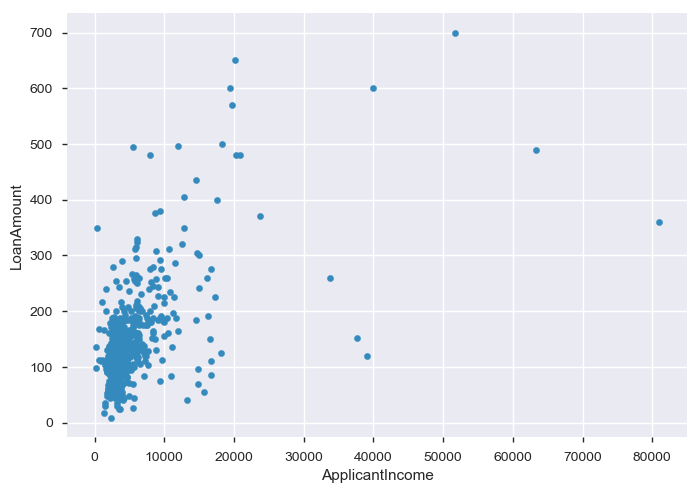

In [82]:
LoanPredict.plot(kind='scatter',x='ApplicantIncome',y='LoanAmount')
print(LoanPredict[['ApplicantIncome','LoanAmount']].corr())

In [142]:
LoanPredict.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.564698,-0.046531,-0.018615,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.189723,-0.059383,0.011134,-0.059187
LoanAmount,0.564698,0.189723,1.000000,0.037152,-0.000250,-0.031808
Loan_Amount_Term,-0.046531,-0.059383,0.037152,1.000000,-0.004705,-0.022549
Credit_History,-0.018615,0.011134,-0.000250,-0.004705,1.000000,0.540556
Loan_Status,-0.004710,-0.059187,-0.031808,-0.022549,0.540556,1.000000


In [144]:
LoanPredict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null int32
dtypes: float64(4), int32(1), int64(1), object(6)
memory usage: 55.2+ KB


In [145]:
Encodcols = LoanPredict.select_dtypes(include=['object'])
Numcols = LoanPredict.select_dtypes(include = np.number)

In [148]:
Encodcolumn = pd.get_dummies(Encodcols, drop_first=True)

In [159]:
LoanPredictDf = pd.concat([Numcols,Encodcolumn],axis=1)

In [170]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [154]:
LoanPredictscaled = scaler.fit_transform(LoanPredictDf)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [161]:
y = LoanPredictDf['Loan_Status']
X = LoanPredictDf.drop('Loan_Status',axis = 1)

In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 101)

In [192]:
from sklearn.linear_model import LogisticRegression
Logit = LogisticRegression()

In [193]:
LoanPredLog = Logit.fit(X_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [194]:
LoanPredLogFinal = LoanPredLog.predict(X_test)

In [195]:
from sklearn.metrics import accuracy_score

In [196]:
print('Accuracy Score in Log Reg without scaling :',accuracy_score(LoanPredLogFinal,y_test))

Accuracy Score in Log Reg without scaling : 0.7886178861788617


In [176]:
ScaledTrain = scaler.fit_transform(X_train)
ScaledTest = scaler.transform(X_test)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [173]:
LoanPredScaledLog = Logit.fit(ScaledTrain,y_train)
LoanPredLogScaledFinal = LoanPredScaledLog.predict(ScaledTest)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [174]:
print('Accuracy Score in Log Reg post scaling :',accuracy_score(LoanPredLogScaledFinal,y_test))

Accuracy Score in Log Reg post scaling : 0.7967479674796748


In [180]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier (criterion='gini')

In [181]:
RFLoanPred = RFC.fit(ScaledTrain,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [197]:
RFLoanPredFInal = RFLoanPred.predict(ScaledTest)

In [198]:
print('Accuracy Score in RF Class without Tuning :',accuracy_score(RFLoanPredFInal,y_test))

Accuracy Score in RF Class without Tuning : 0.7967479674796748


In [201]:
from sklearn.model_selection import GridSearchCV


In [220]:
params = {'n_estimators':[225,250,275],'max_depth':[1,2,3],
         'min_samples_leaf':[1,2,3]}

In [221]:
GS = GridSearchCV(RFLoanPred,params,verbose=3)

In [222]:
GS.fit(ScaledTrain,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] max_depth=1, min_samples_leaf=1, n_estimators=225 ...............
[CV]  max_depth=1, min_samples_leaf=1, n_estimators=225, score=0.7012195121951219, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1, n_estimators=225 ...............
[CV]  max_depth=1, min_samples_leaf=1, n_estimators=225, score=0.7012195121951219, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1, n_estimators=225 ...............
[CV]  max_depth=1, min_samples_leaf=1, n_estimators=225, score=0.6993865030674846, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, n_estimators=250 ...............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=1, min_samples_leaf=1, n_estimators=250, score=0.7012195121951219, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1, n_estimators=250 ...............
[CV]  max_depth=1, min_samples_leaf=1, n_estimators=250, score=0.7012195121951219, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1, n_estimators=250 ...............
[CV]  max_depth=1, min_samples_leaf=1, n_estimators=250, score=0.6993865030674846, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1, n_estimators=275 ...............
[CV]  max_depth=1, min_samples_leaf=1, n_estimators=275, score=0.7012195121951219, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1, n_estimators=275 ...............
[CV]  max_depth=1, min_samples_leaf=1, n_estimators=275, score=0.7012195121951219, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1, n_estimators=275 ...............
[CV]  max_depth=1, min_samples_leaf=1, n_estimators=275, score=0.6993865030674846, total=   0.1s
[CV] max_depth=1, min_samples_leaf=2, n_estimators=225 ........

[CV]  max_depth=2, min_samples_leaf=3, n_estimators=275, score=0.7804878048780488, total=   0.1s
[CV] max_depth=2, min_samples_leaf=3, n_estimators=275 ...............
[CV]  max_depth=2, min_samples_leaf=3, n_estimators=275, score=0.7791411042944786, total=   0.1s
[CV] max_depth=3, min_samples_leaf=1, n_estimators=225 ...............
[CV]  max_depth=3, min_samples_leaf=1, n_estimators=225, score=0.7987804878048781, total=   0.1s
[CV] max_depth=3, min_samples_leaf=1, n_estimators=225 ...............
[CV]  max_depth=3, min_samples_leaf=1, n_estimators=225, score=0.823170731707317, total=   0.1s
[CV] max_depth=3, min_samples_leaf=1, n_estimators=225 ...............
[CV]  max_depth=3, min_samples_leaf=1, n_estimators=225, score=0.8098159509202454, total=   0.1s
[CV] max_depth=3, min_samples_leaf=1, n_estimators=250 ...............
[CV]  max_depth=3, min_samples_leaf=1, n_estimators=250, score=0.7987804878048781, total=   0.1s
[CV] max_depth=3, min_samples_leaf=1, n_estimators=250 .........

[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:   16.4s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [225, 250, 275], 'max_depth': [1, 2, 3], 'min_samples_leaf': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [223]:
GS.best_params_

{'max_depth': 3, 'min_samples_leaf': 2, 'n_estimators': 250}

In [224]:
GS.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [225]:
LoanPredictRF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=True, random_state=102, verbose=0,
            warm_start=False)

In [226]:
RFLoanPredTune = LoanPredictRF.fit(ScaledTrain,y_train)

In [227]:
RFLoanPredTuning = RFLoanPredTune.predict(ScaledTest)

In [228]:
print('Accuracy Score in RF Class post Tuning :',accuracy_score(RFLoanPredTuning,y_test))

Accuracy Score in RF Class post Tuning : 0.7967479674796748


In [233]:
sorted(list(zip(RFLoanPredTune.feature_importances_,X.columns)), reverse=True)

[(0.4739606687967074, 'Credit_History'),
 (0.10290615730394356, 'CoapplicantIncome'),
 (0.07902692336002551, 'ApplicantIncome'),
 (0.0782227440458016, 'LoanAmount'),
 (0.06469051124847859, 'Property_Area_Semiurban'),
 (0.053209909729398305, 'Loan_Amount_Term'),
 (0.048313793437877124, 'Education_Not Graduate'),
 (0.025903389824092092, 'Property_Area_Urban'),
 (0.020000317459333564, 'Married_Yes'),
 (0.016717682496585246, 'Dependents_3+'),
 (0.015867023535152756, 'Dependents_2'),
 (0.008660661352110747, 'Self_Employed_Yes'),
 (0.0067641328313723615, 'Dependents_1'),
 (0.005756084579121131, 'Gender_Male')]

In [236]:
XtrainFI = X_train.drop(['Self_Employed_Yes','Dependents_1','Gender_Male'],axis = 1)
XtestFI = X_test.drop(['Self_Employed_Yes','Dependents_1','Gender_Male'],axis=1)

In [237]:
ScaledXtrainFI = scaler.fit_transform(XtrainFI)
ScaledXtestFI = scaler.transform(XtestFI)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [238]:
LoanPredictRFFI = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=True, random_state=102, verbose=0,
            warm_start=False)

In [239]:
RFLoanPredTuneFI = LoanPredictRFFI.fit(ScaledXtrainFI,y_train)
RFLoanPredTuningFI = RFLoanPredTuneFI.predict(ScaledXtestFI)

In [240]:
print('Accuracy Score in RF Class post Tuning :',accuracy_score(RFLoanPredTuningFI,y_test))

Accuracy Score in RF Class post Tuning : 0.7967479674796748


In [241]:
from sklearn.metrics import classification_report

In [243]:
print(classification_report(y_test,RFLoanPredTuningFI))

              precision    recall  f1-score   support

           0       0.95      0.47      0.63        45
           1       0.76      0.99      0.86        78

   micro avg       0.80      0.80      0.80       123
   macro avg       0.86      0.73      0.74       123
weighted avg       0.83      0.80      0.77       123



In [244]:
RFLoanPredTuneFI.oob_score_

0.814663951120163

In [245]:
from sklearn.metrics import confusion_matrix

NameError: name 'confusion_matrix' is not defined